![](ab-testing.webp)

# Data Story
    An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases.

#### Let's import the necessarily libraries and functions which we are going to use during our project

In [27]:
import numpy as np                                              # For Vectoral Operations
import pandas as pd                                             # For DataFrame Operations
import plotly.express as px                                     # For Visualizations
import plotly.graph_objects as go                               # For Visualizations
from statsmodels.stats.proportion import proportions_ztest      # For A/B test
import scipy.stats as stats                                     # For Statistical Operations

#### Read the data from csv file and convert it into dataframe

In [28]:
df = pd.read_csv("website_ab_test.csv")
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


#### The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

    * Theme: dark or light
    * Click Through Rate: The proportion of the users who click on links or buttons on the website.
    * Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time.
    * Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
    * Scroll Depth: The depth to which users scroll through the website pages.
    * Age: The age of the user.
    * Location: The location of the user.
    * Session Duration: The duration of the user’s session on the website.
    * Purchases: Whether the user purchased the book (Yes/No).
    * Added_to_Cart: Whether the user added books to the cart (Yes/No).

#### Let’s have a look if the data has null values or not:

In [29]:
df.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

##### The data doesn’t have null values. Now let’s have a look at the column insights before moving forward:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


##### Now let’s have a look at the descriptive statistics of the data:

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Click Through Rate,1000.0,0.256048,0.139265,0.010767,0.140794,0.253715,0.370674,0.499989
Conversion Rate,1000.0,0.253312,0.139092,0.010881,0.131564,0.252823,0.373040,0.498916
Bounce Rate,1000.0,0.505758,0.172195,0.200720,0.353609,0.514049,0.648557,0.799658
Scroll_Depth,1000.0,50.319494,16.895269,20.011738,35.655167,51.130712,64.666258,79.997108
Age,1000.0,41.528000,14.114334,18.000000,29.000000,42.000000,54.000000,65.000000
Session_Duration,1000.0,924.999000,508.231723,38.000000,466.500000,931.000000,1375.250000,1797.000000


##### Conversion rate in this data means the daily percentage of users who signed up on the website. Let’s have a look at the relationship between CTR and Conversion Rate of both themes:

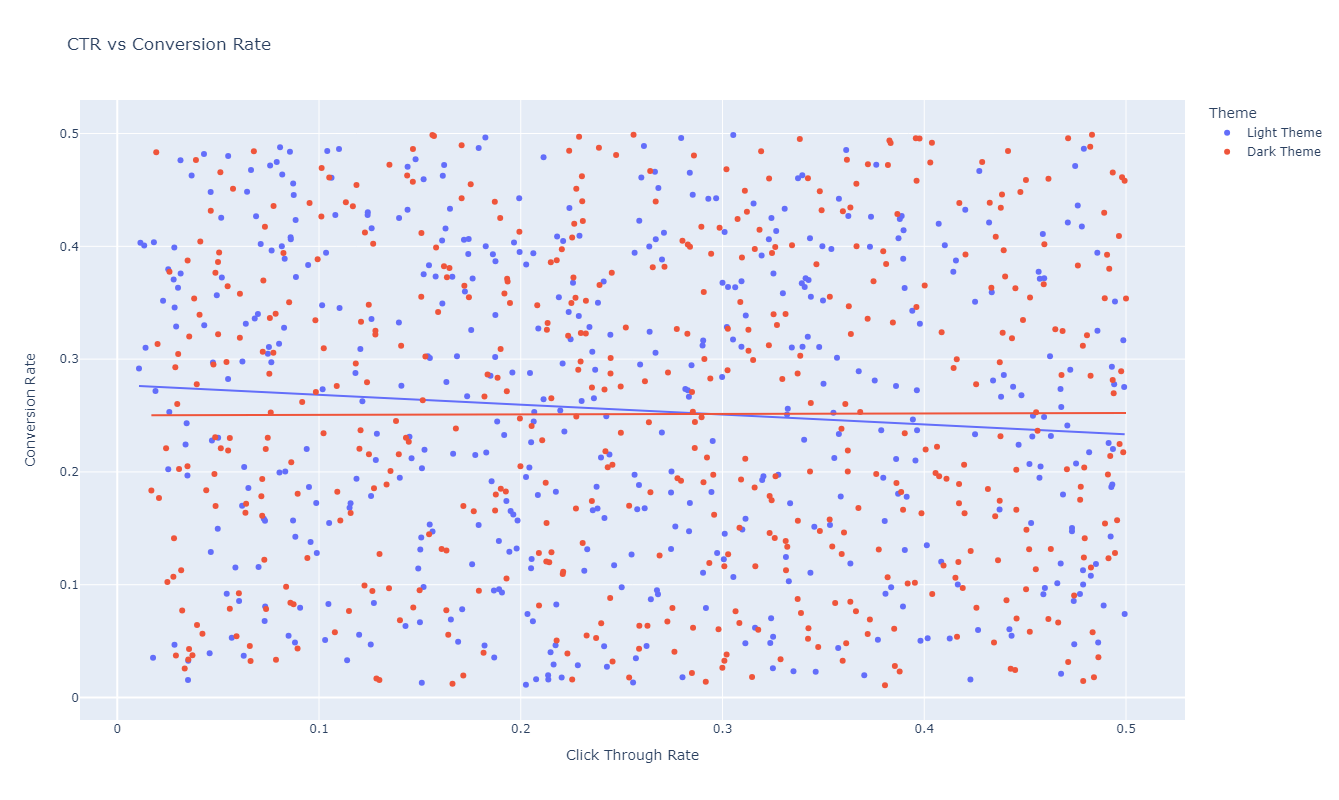

In [32]:
# Create the scatter plot
fig = px.scatter(df, x='Click Through Rate',
                 y='Conversion Rate', color='Theme',
                 title='CTR vs Conversion Rate', trendline='ols', height = 800,width = 1400)
fig.show()

#### Comment:
As shown by the scatter plot the relationship between the Click Through Rate (CTR) and Conversion Rate is consistent and almost unchanged. It means that as more users click on links or buttons (CTR increases), a similar proportion of them also end up signing up daily (Conversion Rate remains stable). In other words, the percentage of users who take the desired action of signing up remains roughly the same regardless of how many users initially clicked on links or buttons to explore the website.

Now, let’s have a look at the histogram of the CTR of both themes:

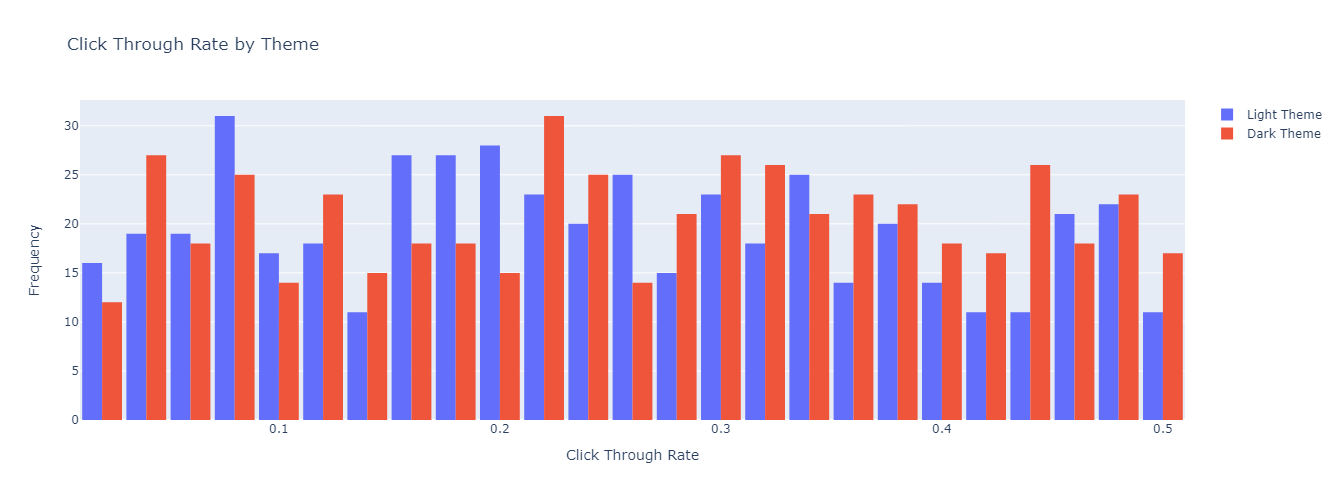

In [33]:
# Extract data for each theme
light_theme_data = df[df['Theme'] == 'Light Theme']
dark_theme_data = df[df['Theme'] == 'Dark Theme']

# Create grouped bar chart for Conversion Rate
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Click Through Rate'], name='Light Theme', opacity=1,nbinsx = 30))
fig.add_trace(go.Histogram(x=dark_theme_data['Click Through Rate'], name='Dark Theme', opacity=1, nbinsx = 30))

fig.update_layout(
    title_text='Click Through Rate by Theme',
    xaxis_title_text='Click Through Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1,
    height = 500,
    width = 1400
)

# Show bar chart
fig.show()

#### Comment:
We can see in the above histogram that there’s not much difference between the performance of both themes.

##### Now let’s have a look at the histogram of the conversion rates of both themes:

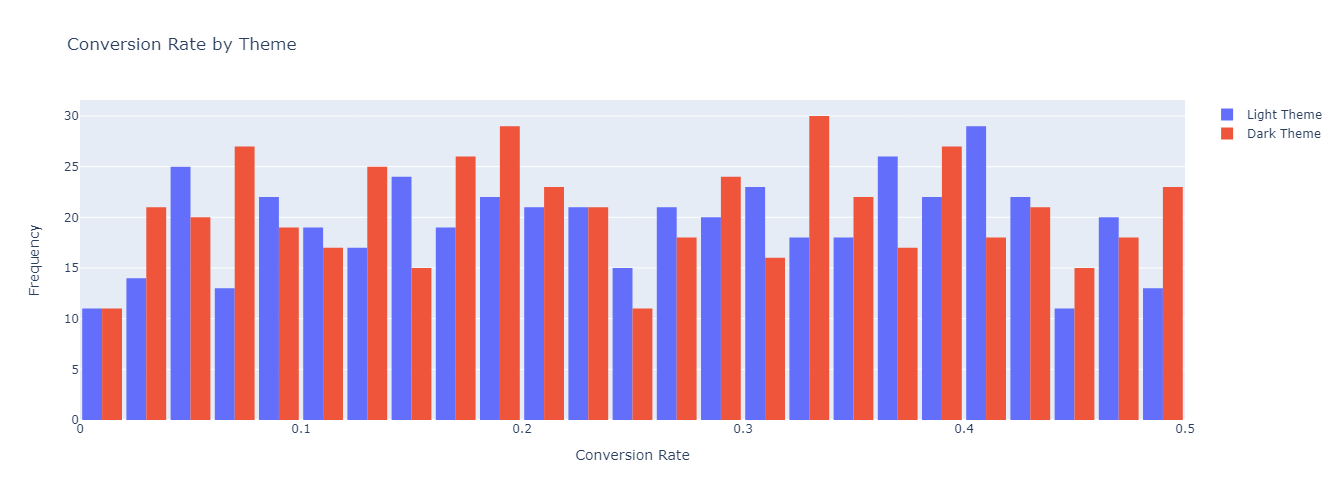

In [34]:
# Create grouped bar chart for Conversion Rate
fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Conversion Rate'], name='Light Theme', opacity=1,nbinsx = 30))
fig.add_trace(go.Histogram(x=dark_theme_data['Conversion Rate'], name='Dark Theme', opacity=1,nbinsx= 30))

fig.update_layout(
    title_text='Conversion Rate by Theme',
    xaxis_title_text='Conversion Rate',
    yaxis_title_text='Frequency',
    barmode='group',
    bargap=0.1,
    height = 500,
    width = 1400
)
# Show bar chart
fig.show()

#### Comment:
Although there’s not much difference, the conversion rate of the dark theme is slightly higher than the light theme. 

##### Now let’s have a look at the distribution of the bounce rates of both themes:

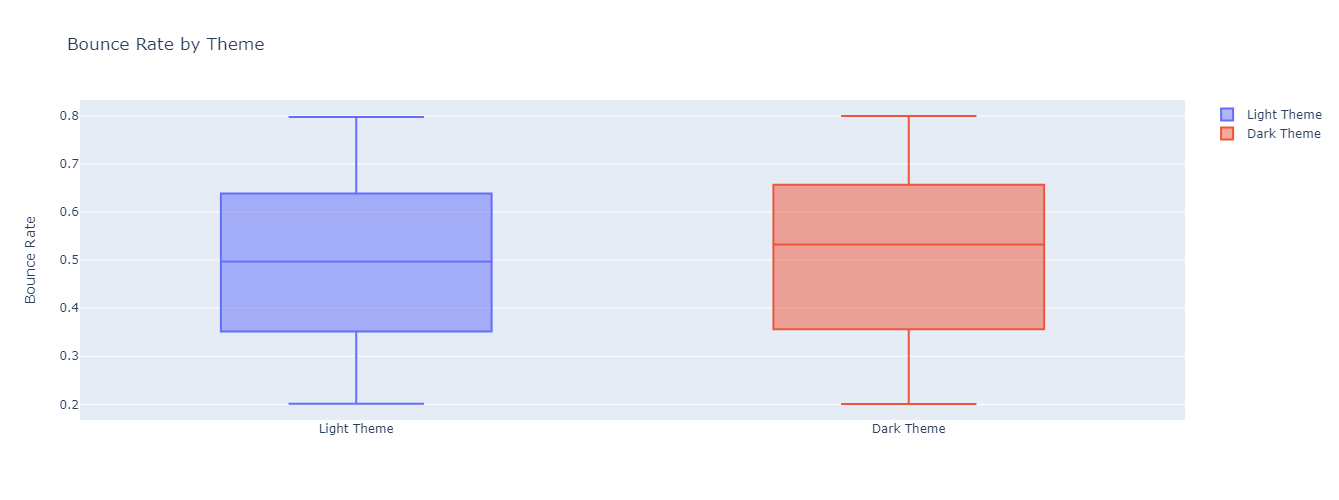

In [35]:
# Create boxplot for Conversion Rates
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Bounce Rate'],name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Bounce Rate'], name='Dark Theme'))

fig.update_layout(
    title_text='Bounce Rate by Theme',
    yaxis_title_text='Bounce Rate',
    height = 500,
    width = 1400
)
# Show the figure
fig.show()

#### Comment:
There’s not much difference between the bounce rates of both themes still, the bounce rate of the light theme is slightly lower (which means it’s slightly better).

#### Now let’s have a look at the scroll depth of both themes:

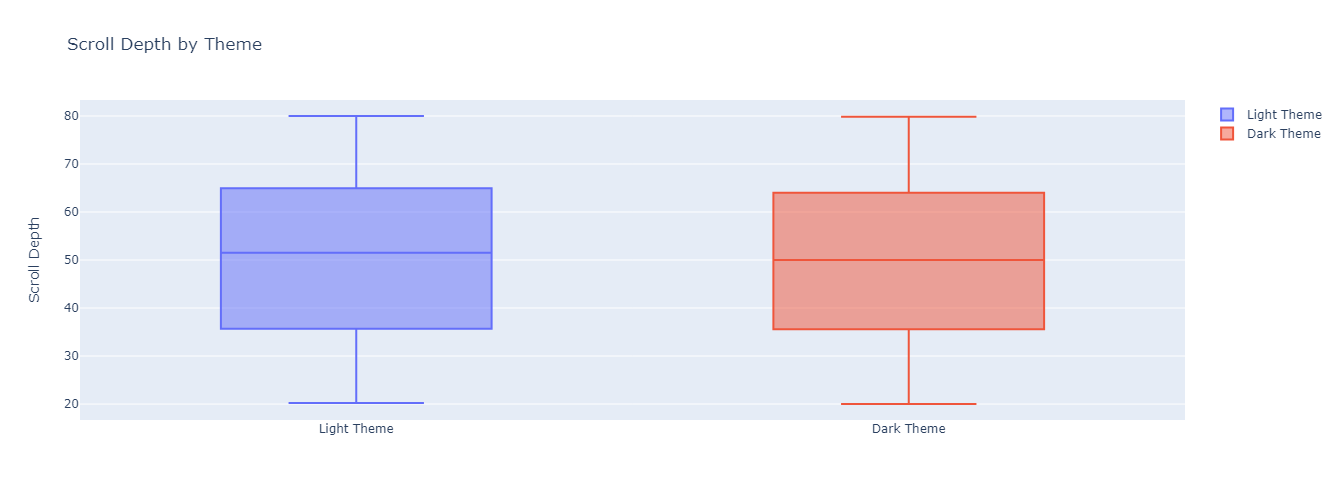

In [36]:
# Create boxplot for Scroll Depths
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme_data['Scroll_Depth'],name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Scroll_Depth'], name='Dark Theme'))

fig.update_layout(
    title_text='Scroll Depth by Theme',
    yaxis_title_text='Scroll Depth',
    height = 500
)
# Show the figure
fig.show()

#### Comment:
There’s not much difference, but the scroll depth of the light theme is slightly better.

##### Now let's perform a two-sample performance test to compare the purchases from both themes:

In [37]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [38]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = pd.Series([light_theme_conversions, dark_theme_conversions])
sample_sizes = pd.Series([light_theme_total, dark_theme_total])

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test (AB test)
# Since the "Purchases" variable is a categorical variable, we do not need to test whether it complies with normal distribution.
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


#### Comment:

    In the comparison of conversion rates based on purchases from both themes, we conducted an A/B test to determine if there is a statistically significant difference in the conversion rates between the two themes. The results of the A/B test are as follows:

                    z-statistic: 0.8531
                    p-value: 0.3936
                    
    The z-statistic measures the difference between the conversion rates of the two themes in terms of standard deviations. In this case, the z-statistic is approximately 0.8531. The positive z-statistic value indicates that the conversion rate of the Light Theme is slightly higher than the conversion rate of the Dark Theme.

    The p-value represents the probability of observing the observed difference in conversion rates or a more extreme difference if the null hypothesis is true. The null hypothesis assumes that there is no statistically significant difference in conversion rates between the two themes. In this case, the p-value is approximately 0.3936.

    Since the p-value is greater than the typical significance level of 0.05 (commonly used in A/B testing), we do not have enough evidence to reject the null hypothesis. It means that the observed difference in conversion rates between the two themes is not statistically significant. The results suggest that any observed difference in the number of purchases could be due to random variation rather than a true difference caused by the themes. In simpler terms, based on the current data and statistical analysis, we cannot confidently say that one theme performs significantly better than the other in terms of purchases.

#### Comparison of Both Themes based on Session Duration
The session duration is also an important metric to determine how much users like to stay on your website. Now let's perform a two-sample t-test to compare the session duration from both themes (but before that we need to check some assumptions (normality, homogeneous variances)):

In [39]:
# Light Theme Session Duration (LTSD)
ltsd = light_theme_data['Session_Duration']
# Dark Theme Session Duration (DTSD)
dtsd = dark_theme_data['Session_Duration']

# Calculate the average session duration for both themes
# Light Theme Average Duration(LTAD)
ltad = ltsd.mean()
# Dark Theme Average Duration(DTAD)
dtad = dtsd.mean()

# Print the average session duration for both themes
print("Light Theme Average Session Duration:", ltad)
print("Dark Theme Average Session Duration:", dtad)

Light Theme Average Session Duration: 930.8333333333334
Dark Theme Average Session Duration: 919.4824902723735


In [40]:
# Perform Normality Assumption Test

In [41]:
session_durations = np.concatenate([ltsd, dtsd])
stats.shapiro(session_durations)

ShapiroResult(statistic=0.9540185332298279, pvalue=3.75133852418311e-17)

#### Comment:
    Shapiro-Wilks Test checks if the light theme session duration(ltsd) and dark theme session duration (dtsd) distributions fit the normal distribution. We do this test to decide whether to apply a parametric or non parametric two sample T test (AB test)
    
    Shapiro Wilks Test Null Hypotesis(H0) says that both distributions fit to the normal distributions. According to our test results p-value < 0.05 so we don't have enough evidence to accept H0. So we can't perform a parametric two sample T test, we need to perform non parametric T test

In [42]:
# Perform non parametric two-sample t-test for session duration
tstat, pval = stats.mannwhitneyu(ltsd, dtsd)
print("Non Parametric A/B Testing for Session Duration - t-statistic:", tstat, 
      " p-value:", pval)

Non Parametric A/B Testing for Session Duration - t-statistic: 126545.5  p-value: 0.7189033061927399


#### Comment
    ManWhitneyU test Null Hypotesis says that there is not a statistically significant difference betweeen light and dark theme sessions durations. Our test says p-value= 0.71 > 0.05.We have enough evidence to accept H0. This means that neither themes is statistically better than the other in terms of Session Duration  

## Summary
    In the end statistically both themes performs the same performance and if we have to use one of the themes we need to perform more tests. For example we can check in which location or in which age group light or dark theme performs better but we are not going to go into these details. So this is how you can perform A/B testing of themes or designs using Python. A/B testing is a powerful and widely used technique to compare and evaluate marketing strategies, designs, layouts, or themes. The primary purpose of A/B testing is to make data-driven decisions that lead to improved user experiences, enhanced performance metrics, and ultimately better business outcomes.